In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import graphviz as gr

In [3]:
file_path_games = "dataset/data_files/1data_matches.csv"
file_path_hero_ids = "heroes.json"
file_path_players = "dataset/data_files/1data_players.csv"

In [4]:
games_df = pd.read_csv(file_path_games)
heroes_df = pd.read_json(file_path_hero_ids)
player_df = pd.read_csv(file_path_players)

In [5]:
games_df.head()

,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win
0,6557257302,1651824585,7770,8,2,1,898754153,46,True
1,6557257302,1651824585,7770,8,2,1,173978074,90,True
2,6557257302,1651824585,7770,8,2,1,118134220,69,True
3,6557257302,1651824585,7770,8,2,1,157475523,114,True
4,6557257302,1651824585,7770,8,2,1,111114687,102,True


In [6]:
heroes_df.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler, Carry]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2


In [7]:
player_df.head(10)

,account_id,competitive_rank,leaderboard_rank,mmr_estimate,rank_tier,solo_competitive_rank,tracked_until
0,898754153,None,18,{'estimate': 7739},80,None,None
1,173978074,6082,6,{'estimate': 6922},80,7742,None
2,118134220,None,119,{'estimate': 6766},80,8560,None
3,157475523,5465,18,{'estimate': 7237},80,7369,None
4,111114687,None,69,{'estimate': 6584},80,None,None
5,206642367,5374,2,{'estimate': 6709},80,6347,None
6,106863163,None,22,{'estimate': 7804},80,8332,None
7,94738847,None,6,{'estimate': 6765},80,8181,None
8,139876032,6017,89,{'estimate': 6772},80,7807,None
9,94296097,None,77,{'estimate': 7026},80,7823,None


In [8]:
games_df.tail()

,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win
1712,6533313112,1650460999,5050,6,2,1,204978090,19,True
1713,6533313112,1650460999,5050,6,2,1,148677133,74,True
1714,6533313112,1650460999,5050,6,2,1,49698664,121,True
1715,6533313112,1650460999,5050,6,2,1,366222432,63,True
1716,6533313112,1650460999,5050,6,2,1,182304190,76,True


In [9]:
print( 'game amount: ' + str(len(games_df.groupby('match_id').count().index)))

game amount: 164


In [10]:
print( 'unique players over the games: ' + str(len(player_df.groupby('account_id').count().index)))

unique players over the games: 594


In [11]:
games_df[games_df['match_id'] == 6509122417]

,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win


In [12]:
# hero experience
# https://api.opendota.com/api/players/320207650/heroes?hero_id=68
# {"hero_id":"68","last_played":1651042802,"games":28,"win":15,"with_games":0,"with_win":0,"against_games":0,"against_win":0}


In [13]:
# GET /players/{account_id}/rankings

# what is this endpoint?

In [14]:
games_df.groupby(['game_mode']).count()

,match_id,start_time,avg_mmr,num_mmr,lobby_type,account_id,hero_id,win
game_mode,,,,,,,,
2,1717,1717,1717,1717,1717,1717,1717,1717


# Data Cleaning

In [15]:
games_df[games_df['match_id'] == 6509122417]

,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win


In [16]:
# filter out duplicate players
print("size players before duplicates:" + str (len(player_df.index)))
player_df = player_df.astype(str).drop_duplicates() 
print("size after player duplicates:" + str (len(player_df.index)))


size players before duplicates:1717
size after player duplicates:594


In [17]:
# delete unnecessary game_modes, we use captains mode in this case
games_df.drop(games_df[games_df.game_mode != 2].index, inplace=True)

In [18]:
#fill in missing data

def convert_estimated_mmr(row):
    print(row)
    return int(re.findall(r'\d+', row['mmr_estimate'])[0])

player_df['mmr_estimate'] = player_df.apply(convert_estimated_mmr, axis=1)


def convert_rank_tier(row):
    l = re.findall(r'\d+', row['rank_tier'])
    if len(l) == 0:
        return 0
    return int(l[0])

player_df['rank_tier'] = player_df.apply(convert_rank_tier, axis=1)
player_df.head(1)



account_id                        898754153
competitive_rank                       None
leaderboard_rank                         18
mmr_estimate             {'estimate': 7739}
rank_tier                                80
solo_competitive_rank                  None
tracked_until                          None
Name: 0, dtype: object
account_id                        173978074
competitive_rank                       6082
leaderboard_rank                          6
mmr_estimate             {'estimate': 6922}
rank_tier                                80
solo_competitive_rank                  7742
tracked_until                          None
Name: 1, dtype: object
account_id                        118134220
competitive_rank                       None
leaderboard_rank                        119
mmr_estimate             {'estimate': 6766}
rank_tier                                80
solo_competitive_rank                  8560
tracked_until                          None
Name: 2, dtype: object
account

,account_id,competitive_rank,leaderboard_rank,mmr_estimate,rank_tier,solo_competitive_rank,tracked_until
0,898754153,None,18,7739,80,None,None


In [19]:
player_df.groupby('rank_tier').count()

,account_id,competitive_rank,leaderboard_rank,mmr_estimate,solo_competitive_rank,tracked_until
rank_tier,,,,,,
0,64,64,64,64,64,64
15,2,2,2,2,2,2
24,1,1,1,1,1,1
35,1,1,1,1,1,1
43,3,3,3,3,3,3
45,1,1,1,1,1,1
51,3,3,3,3,3,3
53,1,1,1,1,1,1
54,1,1,1,1,1,1


In [20]:
# encode hero roles 
# Generate a dataframe of heroes with roles as dummy variables

def getHeroDF(hero):
    '''
    A function used to generate a dummy-value dataframe of heroes. Each row is a hero and each column is a role. 
    The 0-1 values in the dataframe indicates whether a hero (row) could play a role (column).
    
    INPUT:
    - hero: the hero dataframe
    
    OUTPUT:
    - hero_df: the dummy-value dataframe for heroes
    
    '''

    #hero = hero.set_index('id')

    hero_df = pd.DataFrame(hero['roles'].to_list())
#     hero_df['id'] = hero.index
#     hero_df = hero_df.set_index('id')
    #localized_name	primary_attr	attack_type	
    hero_df['primary_attr'] = hero['primary_attr']
    hero_df['attack_type'] = hero['attack_type']
    hero_df = pd.get_dummies(hero_df.stack()).groupby(level=0).sum()
    hero_df['localized_name'] = hero['localized_name']
 #   hero_df['hero_id'] = range(1, len(hero_df) + 1)
    hero_df['hero_id'] = hero['id']

    
    return hero_df

hero_df = getHeroDF(heroes_df)
hero_df.head(10)
#heroes_df.head()

,Carry,Disabler,Durable,Escape,Initiator,Jungler,Melee,Nuker,Pusher,Ranged,Support,agi,int,str,localized_name,hero_id
0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,Anti-Mage,1
1,1,1,1,0,1,1,1,0,0,0,0,0,0,1,Axe,2
2,0,1,1,0,0,0,0,1,0,1,1,0,1,0,Bane,3
3,1,1,0,0,1,1,1,1,0,0,0,1,0,0,Bloodseeker,4
4,0,1,0,0,0,1,0,1,0,1,1,0,1,0,Crystal Maiden,5
5,1,1,0,0,0,0,0,0,1,1,0,1,0,0,Drow Ranger,6
6,0,1,0,0,1,0,1,1,0,0,1,0,0,1,Earthshaker,7
7,1,0,0,1,0,0,1,0,1,0,0,1,0,0,Juggernaut,8
8,1,1,0,1,0,0,0,1,0,1,1,1,0,0,Mirana,9
9,1,1,1,1,0,0,0,1,0,1,0,1,0,0,Morphling,10


In [21]:
games_df['avg_mmr'].isnull().values.any()


False

In [22]:
#Fix data types of columns
games_df['win'] = games_df['win'].astype(bool)


In [23]:
# combine heroes and match dataframes
games_and_heros = pd.merge(games_df, hero_df, on=['hero_id'], how='inner').sort_values(by=['match_id'])
#games_and_heros = games_and_heros.drop(columns = ['name', 'legs'])#.sort_values(by=['match_id'])
print(len(games_and_heros.index))
games_and_heros.head()

1717


,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win,Carry,...,Jungler,Melee,Nuker,Pusher,Ranged,Support,agi,int,str,localized_name
661,6533313112,1650460999,5050,6,2,1,147424186,126,False,1,...,0,1,1,0,0,0,0,1,0,Void Spirit
72,6533313112,1650460999,5050,6,2,1,369842667,90,False,0,...,1,0,1,0,1,1,0,1,0,Keeper of the Light
248,6533313112,1650460999,5050,6,2,1,49698664,121,True,0,...,0,0,1,0,1,1,0,1,0,Grimstroke
377,6533313112,1650460999,5050,6,2,1,168762251,94,False,1,...,0,0,0,0,1,0,1,0,0,Medusa
117,6533313112,1650460999,5050,6,2,1,229037109,102,False,1,...,0,1,0,0,0,1,0,0,1,Abaddon


In [24]:
# combine heroes and match and players dataframes
games_and_heros['account_id'] = games_and_heros['account_id'].astype(int)
player_df['account_id'] = player_df['account_id'].astype(int)
# player_df['rank_tier'] = player_df['rank_tier'].astype(int)


games_and_heros_and_players = pd.merge(games_and_heros, player_df, on=['account_id'], how='inner').sort_values(by=['match_id'])
print(len(games_and_heros_and_players.index))
games_and_heros_and_players.head(20)

1717


,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win,Carry,...,agi,int,str,localized_name,competitive_rank,leaderboard_rank,mmr_estimate,rank_tier,solo_competitive_rank,tracked_until
0,6533313112,1650460999,5050,6,2,1,147424186,126,False,1,...,0,1,0,Void Spirit,None,1331,4574,80,6105,None
1,6533313112,1650460999,5050,6,2,1,369842667,90,False,0,...,0,1,0,Keeper of the Light,None,4887,4270,80,None,None
2,6533313112,1650460999,5050,6,2,1,49698664,121,True,0,...,0,1,0,Grimstroke,None,3489,4453,80,None,1653679347
3,6533313112,1650460999,5050,6,2,1,168762251,94,False,1,...,1,0,0,Medusa,4140,3550,4656,80,4783,None
4,6533313112,1650460999,5050,6,2,1,229037109,102,False,1,...,0,0,1,Abaddon,3589,569,4378,80,3417,None
5,6533313112,1650460999,5050,6,2,1,148677133,74,True,1,...,0,1,0,Invoker,4483,413,4963,80,5274,None
6,6533313112,1650460999,5050,6,2,1,366222432,63,True,1,...,1,0,0,Weaver,5176,625,5021,80,6019,None
7,6533313112,1650460999,5050,6,2,1,248646480,129,False,1,...,0,0,1,Mars,None,1335,4324,80,None,None
8,6533313112,1650460999,5050,6,2,1,182304190,76,True,1,...,0,1,0,Outworld Destroyer,None,898,4900,80,None,None
9,6533313112,1650460999,5050,6,2,1,204978090,19,True,1,...,0,0,1,Tiny,4268,199,4887,80,4702,None


In [25]:
# # delete unnecessary game_modes, we use captains mode in this case
# games_and_heros_and_players.drop(games_and_heros[games_and_heros.game_mode != 2].index, inplace=True)

#drop games where rank is under 70:
# games_and_heros_and_players.drop(games_and_heros_and_players[games_and_heros_and_players.rank_tier < 70].index, inplace=True)

# games_and_heros_and_players.groupby('rank_tier').count()

In [26]:
list(games_and_heros_and_players)

['match_id',
 'start_time',
 'avg_mmr',
 'num_mmr',
 'game_mode',
 'lobby_type',
 'account_id',
 'hero_id',
 'win',
 'Carry',
 'Disabler',
 'Durable',
 'Escape',
 'Initiator',
 'Jungler',
 'Melee',
 'Nuker',
 'Pusher',
 'Ranged',
 'Support',
 'agi',
 'int',
 'str',
 'localized_name',
 'competitive_rank',
 'leaderboard_rank',
 'mmr_estimate',
 'rank_tier',
 'solo_competitive_rank',
 'tracked_until']

In [27]:
games_and_heros_and_players.dtypes

match_id                  int64
start_time                int64
avg_mmr                  object
num_mmr                  object
game_mode                 int64
lobby_type                int64
account_id                int32
hero_id                   int64
win                        bool
Carry                     uint8
Disabler                  uint8
Durable                   uint8
Escape                    uint8
Initiator                 uint8
Jungler                   uint8
Melee                     uint8
Nuker                     uint8
Pusher                    uint8
Ranged                    uint8
Support                   uint8
agi                       uint8
int                       uint8
str                       uint8
localized_name           object
competitive_rank         object
leaderboard_rank         object
mmr_estimate              int64
rank_tier                 int64
solo_competitive_rank    object
tracked_until            object
dtype: object

In [28]:
#Number of wins and losses should be even
games_and_heros_and_players.groupby('rank_tier').count()

,match_id,start_time,avg_mmr,num_mmr,game_mode,lobby_type,account_id,hero_id,win,Carry,...,Support,agi,int,str,localized_name,competitive_rank,leaderboard_rank,mmr_estimate,solo_competitive_rank,tracked_until
rank_tier,,,,,,,,,,,,,,,,,,,,,
0,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
15,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
24,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
35,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
43,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
45,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
51,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
53,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
54,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [29]:
# teams dataFrame
def average(x):
    for i in x:
        print(str(float(i)))
        
    return 'l'#(sum(x) / len(x))

obj = games_and_heros_and_players.groupby(['match_id', 'win'])

def rank_tier_average(x):
    sum = 0;
    c = 0
    for i in x:
        if i == 0:
            pass
        else:
            sum += i
            c += 1
    if c == 0:
        return 100
    else: 
        return sum/c

teams_df = obj.agg(
    team_win=pd.NamedAgg(column="win", aggfunc="first"),
    match_id=pd.NamedAgg(column="match_id", aggfunc="first"),
    start_time=pd.NamedAgg(column="start_time", aggfunc="first"),
    hero_id=pd.NamedAgg(column="hero_id", aggfunc="unique"),
    match_mmr_average=pd.NamedAgg(column="avg_mmr", aggfunc="first"),
    team_mmr_estimate=pd.NamedAgg(column="mmr_estimate", aggfunc="mean"),
    rank_tier_unique_values=pd.NamedAgg(column="rank_tier", aggfunc="unique"),
    rank_tier_average=pd.NamedAgg("rank_tier", lambda x : rank_tier_average(x)),
    
    
    #    geomean_of_hue = pd.NamedAgg('hue', lambda x: x.prod() ** (1 / len(x)))

    
    #roles
    Carry_count=pd.NamedAgg(column="Carry", aggfunc="sum"),
    Support_count=pd.NamedAgg(column="Support", aggfunc="sum"),
    Durable_count=pd.NamedAgg(column="Durable", aggfunc="sum"),
    Disabler_count=pd.NamedAgg(column="Disabler", aggfunc="sum"),
    Escape_count=pd.NamedAgg(column="Escape", aggfunc="sum"),
    Initiator_count=pd.NamedAgg(column="Initiator", aggfunc="sum"),
    Jungler_count=pd.NamedAgg(column="Jungler", aggfunc="sum"),
    Nuker_count=pd.NamedAgg(column="Nuker", aggfunc="sum"),
    Pusher_count=pd.NamedAgg(column="Pusher", aggfunc="sum"),
    #attribute
    agi_count=pd.NamedAgg(column="agi", aggfunc="sum"),
    int_count=pd.NamedAgg(column="int", aggfunc="sum"),
    str_count=pd.NamedAgg(column="str", aggfunc="sum"),
    #range/melee
    Melee_count=pd.NamedAgg(column="Melee", aggfunc="sum"),
    Ranged_count=pd.NamedAgg(column="Ranged", aggfunc="sum"),
)
teams_df['mmr_difference'] = 0.5
teams_df['rank_tier_difference'] = 0.5

teams_df

team_win    match_id  start_time                  hero_id  \
match_id   win                                                                
6533313112 False     False  6533313112  1650460999  [126, 90, 94, 102, 129]   
           True       True  6533313112  1650460999    [121, 74, 63, 76, 19]   
6533388506 False     False  6533388506  1650463781     [83, 120, 94, 36, 3]   
           True       True  6533388506  1650463781    [85, 6, 91, 129, 106]   
6534279808 False     False  6534279808  1650524502   [79, 128, 23, 129, 46]   
...                    ...         ...         ...                      ...   
6557206701 True       True  6557206701  1651821040   [121, 98, 86, 19, 126]   
6557255002 False     False  6557255002  1651824422    [3, 23, 114, 97, 128]   
           True       True  6557255002  1651824422    [84, 49, 94, 39, 121]   
6557257302 False     False  6557257302  1651824585   [121, 60, 8, 123, 106]   
           True       True  6557257302  1651824585   [90, 102, 69, 114, 46]   

                 match_mmr_average  team_mmr_estimate rank_tier_unique_values  \
match_id   win                                                                  
6533313112 False              5050             4440.4                    [80]   
           True               5050             4844.8                    [80]   
6533388506 False              7293             6664.2                    [80]   
           True               7293             7089.4                    [80]   
6534279808 False              6043             6220.8                    [80]   
...                            ...                ...                     ...   
6557206701 True               4210             4963.0         [74, 0, 80, 75]   
6557255002 False              3972             3929.6            [72, 75, 80]   
           True               3972             3931.8                 [0, 80]   
6557257302 False              7770             7015.2                    [80]   
           True               7770             7049.6                    [80]   

                  rank_tier_average  Carry_count  Support_count  ...  \
match_id   win                                                   ...   
6533313112 False              80.00            4              2  ...   
           True               80.00            4              1  ...   
6533388506 False              80.00            3              2  ...   
           True               80.00            3              2  ...   
6534279808 False              80.00            3              3  ...   
...                             ...          ...            ...  ...   
6557206701 True               77.25            2              2  ...   
6557255002 False              77.40            2              3  ...   
           True               80.00            3              2  ...   
6557257302 False              80.00            3              2  ...   
           True               80.00            4              2  ...   

                  Jungler_count  Nuker_count  Pusher_count  agi_count  \
match_id   win                                                          
6533313112 False              1            2             0          1   
           True               0            4             2          1   
6533388506 False              0            3             0          2   
           True               0            3             1          2   
6534279808 False              0            3             0          1   
...                         ...          ...           ...        ...   
6557206701 True               0            5             1          0   
6557255002 False              0            4             0          1   
           True               0            4             1          1   
6557257302 False              0            4             1          3   
           True               1            2             0          2   

                  int_count  str_count  Melee_cou

In [30]:

def set_normalized_mmr_difference(row):
    myResult = row['team_win']
    game_id = row['match_id']
    my_mmr_estimate = row['team_mmr_estimate'] 
    opponent_team_mmr_estimate = teams_df.loc[game_id].loc[not myResult]['team_mmr_estimate']
    total = my_mmr_estimate + opponent_team_mmr_estimate
    return my_mmr_estimate / total
    
teams_df['mmr_difference'] = teams_df.apply(lambda row: set_normalized_mmr_difference(row), axis=1) 

def set_normalized_rank_tier(row):
    myResult = row['team_win']
    game_id = row['match_id']
    my_rank_estimate = row['rank_tier_average'] 
    opponent_team_rank_estimate = teams_df.loc[game_id].loc[not myResult]['rank_tier_average']
    total = my_rank_estimate + opponent_team_rank_estimate
    return my_rank_estimate / total
    

teams_df['mmr_difference'] = teams_df.apply(lambda row: set_normalized_mmr_difference(row), axis=1) 

teams_df['rank_tier_difference'] = teams_df.apply(lambda row: set_normalized_mmr_difference(row), axis=1) 
#df['add'] = df.apply(lambda row : add(row['A'],
#                      row['B'], row['C']), axis = 1)

In [31]:
#for match_id in teams_df['match_id'].unique()
#teams_df.loc[6413678308].loc[False]['hero_id'] = 9

teams_df

team_win    match_id  start_time                  hero_id  \
match_id   win                                                                
6533313112 False     False  6533313112  1650460999  [126, 90, 94, 102, 129]   
           True       True  6533313112  1650460999    [121, 74, 63, 76, 19]   
6533388506 False     False  6533388506  1650463781     [83, 120, 94, 36, 3]   
           True       True  6533388506  1650463781    [85, 6, 91, 129, 106]   
6534279808 False     False  6534279808  1650524502   [79, 128, 23, 129, 46]   
...                    ...         ...         ...                      ...   
6557206701 True       True  6557206701  1651821040   [121, 98, 86, 19, 126]   
6557255002 False     False  6557255002  1651824422    [3, 23, 114, 97, 128]   
           True       True  6557255002  1651824422    [84, 49, 94, 39, 121]   
6557257302 False     False  6557257302  1651824585   [121, 60, 8, 123, 106]   
           True       True  6557257302  1651824585   [90, 102, 69, 114, 46]   

                 match_mmr_average  team_mmr_estimate rank_tier_unique_values  \
match_id   win                                                                  
6533313112 False              5050             4440.4                    [80]   
           True               5050             4844.8                    [80]   
6533388506 False              7293             6664.2                    [80]   
           True               7293             7089.4                    [80]   
6534279808 False              6043             6220.8                    [80]   
...                            ...                ...                     ...   
6557206701 True               4210             4963.0         [74, 0, 80, 75]   
6557255002 False              3972             3929.6            [72, 75, 80]   
           True               3972             3931.8                 [0, 80]   
6557257302 False              7770             7015.2                    [80]   
           True               7770             7049.6                    [80]   

                  rank_tier_average  Carry_count  Support_count  ...  \
match_id   win                                                   ...   
6533313112 False              80.00            4              2  ...   
           True               80.00            4              1  ...   
6533388506 False              80.00            3              2  ...   
           True               80.00            3              2  ...   
6534279808 False              80.00            3              3  ...   
...                             ...          ...            ...  ...   
6557206701 True               77.25            2              2  ...   
6557255002 False              77.40            2              3  ...   
           True               80.00            3              2  ...   
6557257302 False              80.00            3              2  ...   
           True               80.00            4              2  ...   

                  Jungler_count  Nuker_count  Pusher_count  agi_count  \
match_id   win                                                          
6533313112 False              1            2             0          1   
           True               0            4             2          1   
6533388506 False              0            3             0          2   
           True               0            3             1          2   
6534279808 False              0            3             0          1   
...                         ...          ...           ...        ...   
6557206701 True               0            5             1          0   
6557255002 False              0            4             0          1   
           True               0            4             1          1   
6557257302 False              0            4             1          3   
           True               1            2             0          2   

                  int_count  str_count  Melee_cou

# Data Analysis

array([[<AxesSubplot:title={'center':'team_mmr_estimate'}>]], dtype=object)

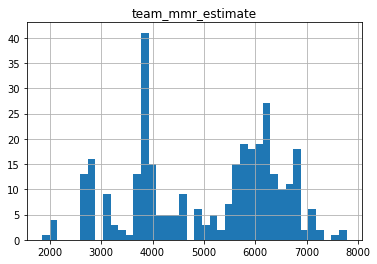

In [32]:
# corr = games_and_heros.corr()
# # corr.style.background_gradient(cmap='coolwarm')
# corr

teams_df.hist(column='team_mmr_estimate', bins=40) 
#plt.plot(teams_df['team_mmr_estimate'].to_list())

array([[<AxesSubplot:title={'center':'mmr_difference'}>]], dtype=object)

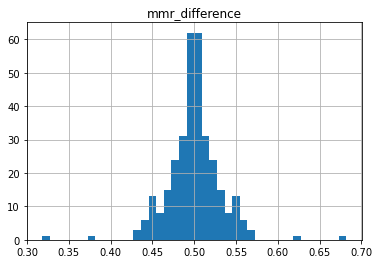

In [33]:
teams_df.hist(column='mmr_difference', bins=40) 

array([[<AxesSubplot:title={'center':'rank_tier_difference'}>]],
      dtype=object)

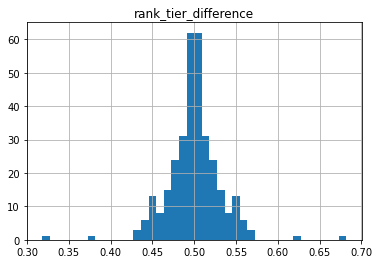

In [34]:
teams_df.hist(column='rank_tier_difference', bins=40) 

In [35]:
#player_df.hist(column='rank_tier')

In [36]:
# corr = games_and_heros['win'].corr(games_and_heros['attack_type'])
# games_and_heros['attack_type'].value_counts(normalize=True) * 100

In [37]:
def selection_size_to_percentage(s, dataframe):
     return (s / len(dataframe.index)) * 100

    
conditions = [
    (teams_df['Carry_count'] >= 4), 
    True, #(teams_df['mmr_difference'] >= 0.5), 
    True,#(teams_df['rank_tier_difference'] >= 0.54), 
    True, #(teams_df['Support_count'] >= 3)
]


win = selection_size_to_percentage(len(teams_df[
                                        conditions[0] &
                                        conditions[1] &
                                        conditions[2] &
                                        conditions[3] &
                                        (teams_df['team_win'] == True)].index), teams_df)

loss = selection_size_to_percentage(len(teams_df[
                                        conditions[0] &
                                        conditions[1] &
                                        conditions[2] &
                                        conditions[3] &
                                        (teams_df['team_win'] == False)].index), teams_df)


game_count = selection_size_to_percentage(len(teams_df[
                        conditions[0] &
                        conditions[1] &
                        conditions[2] &
                        conditions[3] 
                     ].index), teams_df)


print('win %: ' + str(win))
print('loss %: ' + str(loss))

print('difference (win-loss)%: ' + str(win - loss))
print('percentage of games wher this condition(treatment) applies: ' + str(game_count))


def apply_treatment(row):
    if row['Carry_count'] >= 4:
        return 1
    else: 
        return 0

def apply_confounder_rank_tier(row): 
    if row['rank_tier_difference'] >= 0.5:
        return 1
    else:
        return 0 

teams_df['condition'] = teams_df.apply(lambda row: apply_treatment(row), axis=1) 
teams_df['confounder_rank_tier'] = teams_df.apply(lambda row: apply_confounder_rank_tier(row), axis=1)

# teams_df["condition"] = teams_df[
#                                     conditions[0] &
#                                     conditions[1] &
#                                     conditions[2] &
#                                     conditions[3]
#                                 ]

win %: 9.75609756097561
loss %: 13.719512195121952
difference (win-loss)%: -3.9634146341463428
percentage of games wher this condition(treatment) applies: 23.47560975609756


In [38]:
teams_df.head(1)

,,team_win,match_id,start_time,hero_id,match_mmr_average,team_mmr_estimate,rank_tier_unique_values,rank_tier_average,Carry_count,Support_count,...,Pusher_count,agi_count,int_count,str_count,Melee_count,Ranged_count,mmr_difference,rank_tier_difference,condition,confounder_rank_tier
match_id,win,,,,,,,,,,,,,,,,,,,,,
6533313112,False,False,6533313112,1650460999,"[126, 90, 94, 102, 129]",5050,4440.4,[80],80.0,4,2,...,0,1,2,2,3,2,0.478223,0.478223,1,0


In [39]:
# player_df.groupby('rank_tier').count()

array([[<AxesSubplot:title={'center':'rank_tier_difference'}>]],
      dtype=object)

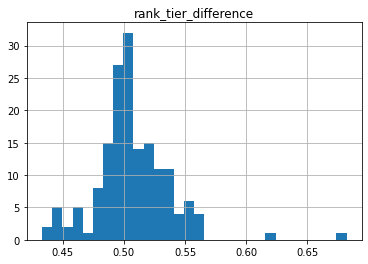

In [40]:
teams_df[(teams_df['team_win'] == True)].hist(column='rank_tier_difference', bins=30) 

In [41]:
# do i drop matches where there is no competitive rank?


# Simple IPW on discrete treatment and discrete confounder

In [42]:
teams_df.groupby('condition').count()

,team_win,match_id,start_time,hero_id,match_mmr_average,team_mmr_estimate,rank_tier_unique_values,rank_tier_average,Carry_count,Support_count,...,Nuker_count,Pusher_count,agi_count,int_count,str_count,Melee_count,Ranged_count,mmr_difference,rank_tier_difference,confounder_rank_tier
condition,,,,,,,,,,,,,,,,,,,,,
0,251,251,251,251,251,251,251,251,251,251,...,251,251,251,251,251,251,251,251,251,251
1,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77


In [43]:
# # create pseudo population
# total = len(teams_df.index)
# treated = len(teams_df[(teams_df['condition'] == 1)].index)
# non_treated = len(teams_df[(teams_df['condition'] == 0)].index)
# psuedo_pop_df = teams_df
# psuedo_pop_df['confounder'] = teams_df['confounder_rank_tier']
# psuedo_pop_df['treatment'] = teams_df['condition']

# psuedo_pop_df = psuedo_pop_df.loc[:, psuedo_pop_df.columns.intersection(['confounder_rank_tier','treatment', 'team_win'])]
# psuedo_pop_df.head()


In [44]:
# def convert_estimated_mmr(row):
#     print(row)
#     return int(re.findall(r'\d+', row['mmr_estimate'])[0])

# player_df['mmr_estimate'] = player_df.apply(convert_estimated_mmr, axis=1)

# who gets the treatmen 

# 43 + 34
# 121 + 130

# len(psuedo_pop_df[(psuedo_pop_df['treatment'] == 0) &  (psuedo_pop_df['confounder_rank_tier'] == 1)].index)

In [45]:
# amount of teams
str(len(teams_df.index))

'328'

In [46]:
# wins / teams
print(
    str(len(teams_df[(teams_df['condition'] == 1) &  (teams_df['confounder_rank_tier'] == 0)].index)) + 
    ' / ' + 
    str(len(teams_df.index))
    )                                 

34 / 328


In [47]:
## advantage / Yes
print(
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 1) & (teams_df['condition'] == 1) & (teams_df['team_win'] == 1)].index)) + 
    ' / ' + 
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 1) & (teams_df['condition'] == 1) ].index))
    )                                 

21 / 43


In [48]:
## advantage / No
print(
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 1) & (teams_df['condition'] == 0) & (teams_df['team_win'] == 1)].index)) + 
    ' / ' + 
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 1) & (teams_df['condition'] == 0) ].index))
    )                                 

77 / 121


In [49]:
## dis-advantage / Yes
print(
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 0) & (teams_df['condition'] == 1) & (teams_df['team_win'] == 1)].index)) + 
    ' / ' + 
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 0) & (teams_df['condition'] == 1) ].index))
    )                                 

11 / 34


In [50]:
## dis-advantage / No
print(
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 0) & (teams_df['condition'] == 0) & (teams_df['team_win'] == 1)].index)) + 
    ' / ' + 
    str(len(teams_df[(teams_df['confounder_rank_tier'] == 0) & (teams_df['condition'] == 0) ].index))
    )                                 

55 / 130


- Treatment in this case is  carry_count >= 4 

- 328 teams

| Rank-advantage\Treatment | Yes (1)  | No (0) |
| --- |---|---|
| Combined |33 / 77 | 132 / 251 |
| rank-advantage | 21 / 43  | 77 / 121  |
| rank-disadvantage |  11 / 34 |  55 / 130 |

probability of Treatment, given rank advantage: 43 / (43 + 121) = 0.26 given rank dis-advantage: 34 / (34 + 130) = 0.2 

probability of no-Treatment, given rank advantage: 121 / (43 + 121) = 0.73 given rank dis-advantage: 130 / (34 + 130) = 0.8 

(since we look only at binary rank advantage, the teams are basically identical within their groups, so we can use group-level weights)

Calculating IP-weighted average: $ (1/Pr[T|C] ) ·Pr[W|T,C] $

#### Correcting for confounder:


change of winning for Treatment = $ ( ( ( 43/(43 + 121) ) ^ {(-1)} * (21/43) ) + ((34 / (34 + 130)) ^ {-1} * (11/34)) ) / ((( 43 / (43 + 121) ) ^ {(-1)}) + ((34 / (34 + 130)) ^ {-1})) = $ 39.6%

with correction for confounder: 39.6%

without correction for confounder: 41.6%

-------------

change of winning for no-Treatment = $ ( ( ( 121 / (43 + 121) ) ^ {(-1)} * (77/121) ) + ((130 / (34 + 130)) ^ {-1} * (55/130)) ) / ((( 121 / (43 + 121) ) ^ {(-1)}) + ((130 / (34 + 130))) ^ {-1}) = $ 53,3%

with correction for confounder: 53.3%

without correction for confounder: 52.58%

In [51]:
# chance of winning given treatment without correction for confounder: 
len(teams_df[(teams_df['team_win'] == 1) & (teams_df['condition'] == 1) ].index) / len(teams_df[(teams_df['condition'] == 1)])

0.4155844155844156

In [52]:
# chance of winning given no treatment without correction for confounder: 
len(teams_df[(teams_df['team_win'] == 1) & (teams_df['condition'] == 0) ].index) / len(teams_df[(teams_df['condition'] == 0)])

0.5258964143426295

# Rank_tier regression model

we want to estimate Pr[ A=1 | Confounders]

In [53]:
# g = gr.Digraph()
# g.edge("Z", "X")
# g.edge("U", "X")
# g.edge("U", "Y")

# g.edge("medicine", "survived")
# g.edge("severeness", "survived")
# g.edge("severeness", "medicine")

# g

In [54]:
rank_tier_condition = teams_df[['rank_tier_difference', 'condition', 'team_win']]
rank_tier_condition['condition'] = rank_tier_condition['condition'].astype(int)
rank_tier_condition['team_win'] = rank_tier_condition['team_win'].astype(int)
rank_tier_condition.head()

C:\Users\Christof\AppData\Local\Temp\ipykernel_19056\202720262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_tier_condition['condition'] = rank_tier_condition['condition'].astype(int)
C:\Users\Christof\AppData\Local\Temp\ipykernel_19056\202720262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_tier_condition['team_win'] = rank_tier_condition['team_win'].astype(int)


rank_tier_difference  condition  team_win
match_id   win                                             
6533313112 False              0.478223          1         0
           True               0.521777          1         1
6533388506 False              0.484542          0         0
           True               0.515458          0         1
6534279808 False              0.507323          0         0

In [55]:
x = rank_tier_condition['rank_tier_difference'].to_numpy().reshape(-1,1)
y = rank_tier_condition['condition'].to_numpy()
win = rank_tier_condition['team_win'].to_numpy()
y

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=40)

In [57]:
# logistic regressions tier-ranking

clf = LogisticRegression(random_state=0).fit(x, y)

#class_weight = 'balanced'

In [58]:
clf.predict([[0.7]])

array([0])

In [59]:
accuracy_score(y_true=y, y_pred=clf.predict(x))

0.7652439024390244

In [60]:
# probability of treatment and no treatmnent
resArray = clf.predict_proba(x)

resArray[0]

array([0.76531226, 0.23468774])

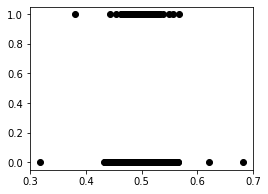

In [61]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(x.ravel(), y, color="black", zorder=20)
plt.show()

In [62]:
combined = np.column_stack((resArray, y, x))
combined[:5]

#combined = np.array(combined,)
# prob of no treatment, prob of treatment, test_class_values, confounder (s)


array([[0.76531226, 0.23468774, 1.        , 0.47822341],
       [0.76517532, 0.23482468, 1.        , 0.52177659],
       [0.76529239, 0.23470761, 0.        , 0.48454223],
       [0.76519519, 0.23480481, 0.        , 0.51545777],
       [0.76522077, 0.23477923, 0.        , 0.50732344]])

In [63]:
weigthed_combined = np.zeros((len(combined), 2))
#dtype=[('weight', float), ('treatment', int)]
i = 0
for row in combined:
    if np.isclose(row[2], 0):
        #print('0')
        weight =  row[0]**(-1)
        #print(weight)
        weigthed_combined[i] = [weight, row[2]] 
    else:
        #print('1')
        weight =  row[1]**(-1)
        #print(weight)
        weigthed_combined[i] = [weight, row[2]] 
    
    i += 1

weigthed_combined_with_win = np.column_stack((weigthed_combined, win))
weigthed_combined_with_win[:10]
#list[:5]

array([[4.26098093, 1.        , 0.        ],
       [4.25849623, 1.        , 1.        ],
       [1.30669011, 0.        , 0.        ],
       [1.30685609, 0.        , 1.        ],
       [1.30681241, 0.        , 0.        ],
       [1.30673377, 0.        , 1.        ],
       [1.30683937, 0.        , 0.        ],
       [4.26044264, 1.        , 1.        ],
       [1.3067739 , 0.        , 0.        ],
       [1.30677228, 0.        , 1.        ]])

In [64]:
df_results_weigths =pd.DataFrame(data=weigthed_combined_with_win[0:,0:], 
                 index= [i for i in range(weigthed_combined_with_win.shape[0])],
                 columns=['inverse_p_weight', 'treatment', 'win'])

df_results_weigths['treatment'] = df_results_weigths['treatment'].astype(int)
df_results_weigths['win'] = df_results_weigths['win'].astype(int)

In [65]:
df_results_weigths.head(5)

,inverse_p_weight,treatment,win
0,4.260981,1,0
1,4.258496,1,1
2,1.306690,0,0
3,1.306856,0,1
4,1.306812,0,0


In [66]:
#len(teams_df[(teams_df['team_win'] == 1) & (teams_df['condition'] == 1) ].index) / len(teams_df[(teams_df['condition'] == 1)])
#df_results_weigths['inverse_p']

print('Ip-Weighted average: \n')


selection = 0
treatmentTotal = 0 
for i,  row in df_results_weigths.iterrows():
    if (row['treatment'] == 1) & (row['win'] == 1):
        selection += row['inverse_p_weight']
    if row['treatment'] == 1:
        treatmentTotal +=  row['inverse_p_weight']
    
print('In teams with the treatment: the change of you winning is: ') 
print (str(selection / treatmentTotal))


noTreatmentWin = 0
noTreatmentTotal = 0 
for i,  row in df_results_weigths.iterrows():
    if (row['treatment'] == 0) & (row['win'] == 1):
        noTreatmentWin += row['inverse_p_weight']
    if row['treatment'] == 0:
        noTreatmentTotal +=  row['inverse_p_weight']

print('In teams with NO treatment: the change of you winning is: ') 
print (str(noTreatmentWin / noTreatmentTotal))


Ip-Weighted average: 

In teams with the treatment: the change of you winning is: 
0.4155372217873372
In teams with NO treatment: the change of you winning is: 
0.5259111995236089


In [67]:
print("Original population size:  " +  str(len(df_results_weigths.index)))

print("Psuedo population size:  " +  str(df_results_weigths['inverse_p_weight'].sum()))

print("The Psuedo population should be doube the size of the original population")


Original population size:  328
Psuedo population size:  655.9987802512907
The Psuedo population should be doube the size of the original population
